# **Soal Praktikum 7 MA2151 Sikomat 2020**

## 1 (narasi menyusul)

Tanpa tedeng aling-aling, dengan menjalankan kode berikut, Anda akan mengunduh data yang akan Anda pakai di soal ini.

In [1]:
import requests
import csv


# Mengunduh data yang diperlukan di praktikum ini
data = requests.get("https://raw.githubusercontent.com/"
                    "kekavigi/materi-tutor/master/TES/data.csv").text 

with open("data.csv", "w") as f: f.write(data)
del data

with open('data.csv', newline='') as csvfile:
    # Mengonversi data csv menjadi array di Python, dengan pembatas ';'
    data = list(csv.reader(csvfile,delimiter=';')) 

Selanjutnya, silakan kerjakan soal-soal berikut, dengan memperhatikan hal berikut:

*   **NIM 10119001-10119063 mengerjakan data nilai ujian terhadap nilai penerimaan**
*   **NIM 10119064-10119115 mengerjakan data nilai TOEFL terhadap nilai penerimaan**
*   **NIM lain mengerjakan data IPK terbobot terhadap nilai penerimaan**

a. Plot titik-titik data yang ada di data yang telah Anda unduh sebelumnya, dengan mengacu catatan di atas. Animasikan plot Anda sehingga titik-titik tersebut diplot "satu-per-satu" di plot Anda.

b. Lakukan pencocokan *least-square* data yang telah anda plot di bagian sebelumnya terhadap suatu fungsi linear.

c. (spoiler Andat) **Koefisien determinasi** dari sebuah himpunan data berguna untuk mengukur kedekatan data tersebut ke suatu fungsi. Diberikan $n$-tupel data $\{(x_i,y_i)\}_{i=1}^n$, misalkan $(x_i,y_i)$ diaproksimasi sebuah model oleh titik $(x_i,f_i)$.

Misal $\bar{y}$ adalah rataan seluruh $y_i$. Nilai koefisien determinasi ($R^2$) dapat dihitung sebagai berikut:  $$
R^2 = 1-\dfrac{\displaystyle \sum_{i=1}^n (y_i-f_i)^2}{\sum_{i=1}^n (y_i-\bar{y})^2}
$$

Tentukan koefisien determinasi antar dua data di bagian a terhadap fungsi di bagian b. 


### Jawab

Karena tidak ada perbedaan besar mengenai data yang dikerjakan, jawaban berikut adalah jawaban mengenai data nilai ujain terhadap nilai penerimaan.

In [2]:
# Menulis ini agar tidak perlu ditulis ulang
# di blok-blok kode selanjutnya
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.optimize as optimize

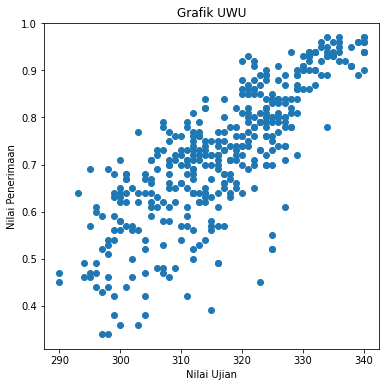

In [3]:
#Jawaban 1a
# Akan digunakan scatterplot untuk menampilkan [animasi] hubungan 
# antara data nilai ujian dengan data nilai penerimaan.

# mengumpulkan data
x = []  # nilai ujian
y = []  # nilai penerimaan

for baris in data[1:]:
    # pada setiap baris data, nilai ujian ada di kolom
    # kedua dan nilai penerimaan ada di baris kelima

    # ubah teks 'ab,cd' menjadi float 'ab.cd'
    ujian  = float(baris[1].replace(',', '.'))
    terima = float(baris[4].replace(',', '.'))

    x.append(ujian)
    y.append(terima)
    
# ubah jadi np.array, opsional namun memudahkan
x = np.array(x)
y = np.array(y)

# membuat plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y)

plt.title('Grafik UWU')
plt.xlabel('Nilai Ujian')
plt.ylabel('Nilai Penerimaan');

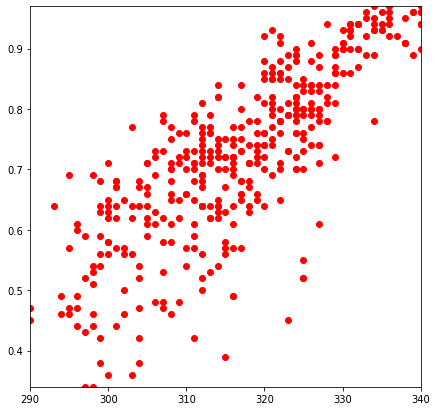

In [4]:
# membuat animasi

# Menyiapkan figure, plot
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

# Menyiapkan variabel-variabel teknis untuk animasi
banyak_frame = range(1, len(x))  # bisa juga len(y), toh banyaknya sama

UWU = sorted(zip(x,y)) # opsional, mengurutkan data
x = np.array([xi for xi,yi in UWU])
y = np.array([yi for xi,yi in UWU])

# Menyiapkan plot saat t = 0
grafikUWU, = plt.plot([x[0]], [y[0]], 'ro')

# Fungsi iterasi animasi
def animate(i):
    # Pada iterasi ke-i, tampilkan data ke-0 sampai ke-i
    grafikUWU.set_data(x[:i], y[:i])
    return grafikUWU

# Fungsi init
def init():
    return None

anim = animation.FuncAnimation(fig, animate,
                               frames=banyak_frame, blit=False,
                               interval=10, init_func=init)


# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim


# dari grafik [dan animasi], terlihat ada hubungan linear yang
# tidak terlalu kuat antara data nilai ujian dan nilai penerimaan

Hasil pencocokan fungsi linear f(x) = a*x + b dengan data:
f(x) = 0.009975882043339861*x - 2.4360842504453935


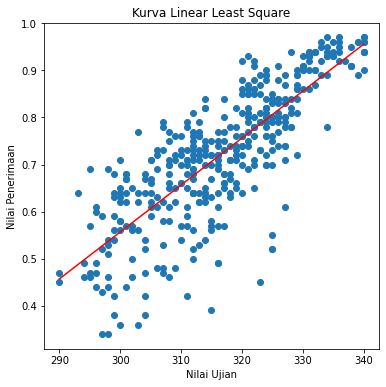

In [5]:
# Jawaban 1b

# fungsi linear untuk pencocokan
def f(x, a, b):
    return a*x + b

# melakukan pencocokan least-square
[a, b], pcov = optimize.curve_fit(f, x, y)

# tampilkan jawaban
print('Hasil pencocokan fungsi linear f(x) = a*x + b dengan data:')
print('f(x) = {}*x {} {}'.format(a, '+' if b>=0 else '-', abs(b)))

# tampilkan plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y)
plt.plot(x, f(x, a, b), 'r')

plt.title('Kurva Linear Least Square')
plt.xlabel('Nilai Ujian')
plt.ylabel('Nilai Penerimaan');


# didapatkan fungsi linear f(x) = a*x+b yang menghampiri data

In [6]:
# Jawaban 1c
# Akan menghitung koefisien determinasi berdasarkan
# persamaan yang diberikan oleh soal

ss_res = sum((y-f(x, a, b))**2)
ss_tot = sum((y - y.mean())**2)
             
R2 = 1 - ss_res/ss_tot

print(R2)

# Hasil R2 = 0.6441835498438339 ~= 0.644 menunjukkan bahwa
# sekitar 64.4% variansi data sudah dapat dijelaskan oleh
# fungsi linear f(x). Namun, ini juga berarti masih ada
# sekitar 100% - 64.4% = 35.6% variansi yang tidak dapat
# dijelaskan oleh model fungsi linear yang diperoleh.

0.6441835498438339
